In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix

Necessary Imports

In [2]:
heart_data = pd.read_csv('/content/heart.csv')


Gets data from heart.csv and puts into a dataframe

In [3]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


checking if data is imported correctly

In [4]:
pd.isna(heart_data).sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


checked if any of the columns have null values

In [5]:
sex_place_holder = pd.get_dummies(heart_data['Sex'],dtype=int,drop_first=True)
sex_place_holder.head()
heart_data['S'] = sex_place_holder
ExerciseAngina_place = pd.get_dummies(heart_data['ExerciseAngina'],dtype=int,drop_first=True)
heart_data['E'] = ExerciseAngina_place
heart_data.head()
heart_data['R'] = pd.get_dummies(heart_data['RestingECG'],dtype=int)['Normal']


this code converts the values for sex and exersize angina to integer values so they can be used in the model

Sex:
- M = 1
- F = 0

HeartAngina:

- N = 0
- Y = 1

RestingECG:

- Normal: 1
- ST: 0

In [6]:
#heart_data = heart_data.drop(columns=['sex'])
heart_data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,S,E,R
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,0,1


In [7]:
#scatter_matrix(heart_data, figsize=(50,50))

<Axes: xlabel='S', ylabel='HeartDisease'>

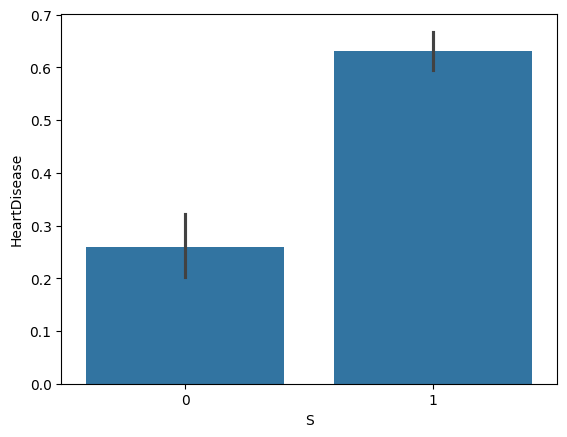

In [8]:
sns.barplot(data=heart_data,x='S',y='HeartDisease')


<Axes: xlabel='E', ylabel='HeartDisease'>

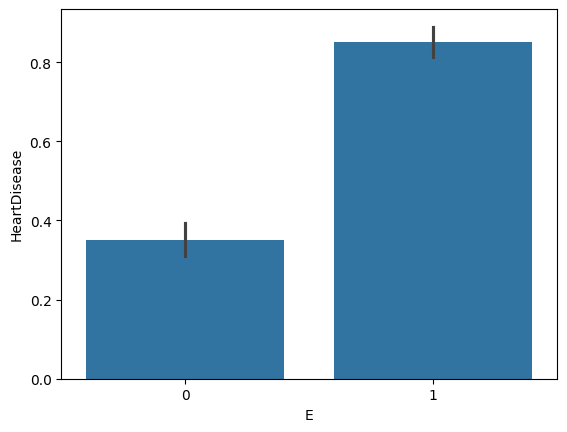

In [9]:
sns.barplot(data=heart_data,x='E',y='HeartDisease')



The above graphs and bar charts are for exploritory data analysis to find  trends in the data

In [10]:
X = pd.DataFrame(heart_data[['S','E']].copy())
Y = pd.DataFrame(heart_data['HeartDisease'].copy())
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.8, random_state=1)

Used S and E which stands for sex and heart diesase and then split X and Y into training and testing

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


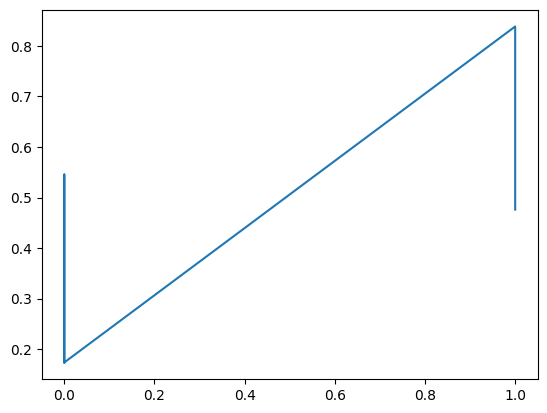

In [11]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train, Y_train)
y_pred = log_model.predict(X_test)
prob = log_model.predict_proba(X_test)[:,1]
# Predict probabilities
x = X_test.iloc[:, 0].values
idx = np.argsort(x)
x_sorted    = x[idx]
prob_sorted = prob[idx]
# Flatten and sort X_test and prob
#prob = prob.flatten()

plt.plot(x_sorted,prob_sorted)

Created a logistic regression model and trained it using scikit learn. Then i plotted the graph of my logistic model.

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(Y_test,y_pred)


0.7360544217687075

used the accuracy_score function to find out how accurate my model predicted heart disease diagnosises.

In [13]:
confusion_matrix(Y_test,y_pred)

array([[287,  42],
       [152, 254]])

i created a confusion matrix to analyize how many true positives and negatives compared to false postiives and negatives

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7360544217687075

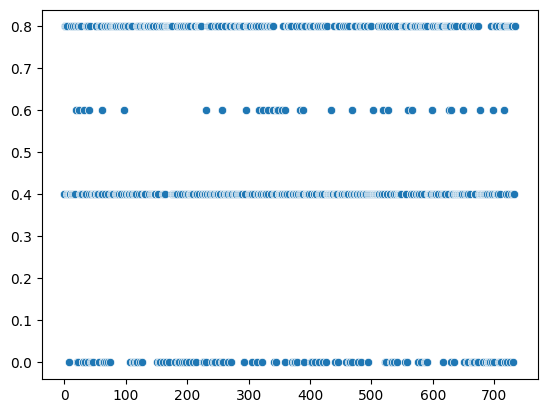

In [14]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model = KNN_model.fit(X_train, Y_train)
knn_pred = KNN_model.predict(X_test)
prob_knn = KNN_model.predict_proba(X_test)[:,1]
sns.scatterplot(prob_knn)
accuracy_score(Y_test,knn_pred)

I trained a KNN model with 5 neighbors which means 5 data points will be used to classify a new data point. Then i plotted a scatterplot of my KNN model and found the accuracy of my KNN model which is the same as my logistic model.

In [15]:
confusion_matrix(Y_test,knn_pred)

array([[287,  42],
       [152, 254]])

created a confusion matrix for my KNN model and see that it produced the same results as the logistic model
